# Project B3: STOCK MARKET. Using neural networks for stock market prediction

In our project we will focus on predictions on the stock market - the highly volatile and complex time series. Traditionally machine learning approaches like SVM and Regressions are used to predict possible price movements. However in recent research it is shown that neural networks are much better at handling non-linear models. In this project we will see for ourselves, if it is true. 

# Imports

These are the imports that are used in the whole project for plotting and working with Dataframes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data

Reading data into respective dataframes.

In [2]:
def create_dataframe(filename):
  df = pd.read_csv(filename)
  return df

# Huge Stock Market Dataset: Historical daily prices and volumes of all U.S. stocks and ETFs. 
# https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

df_amazon = create_dataframe("amzn.us.txt")
df_google = create_dataframe("googl.us.txt")
df_apple = create_dataframe("aple.us.txt")
df_microsoft = create_dataframe("msft.us.txt")
df_samsung = create_dataframe("samg.us.txt")

Checking the data in the dataframe, whether it contains NaN values. As the original files should not contain any NaN files, this is to check whether the data we have used is not mutated.

In [3]:
def prepare_data(dataframe):
  print("Preparing Data : ")
  nrofNaNs = dataframe.isnull().sum().sum()
  if(nrofNaNs == 0):
    print("No NaN values found, returning original dataframe.")
    return dataframe
  else:
    print("Found NaN values")

In [4]:
df_new_amazon = prepare_data(df_amazon)
df_new_google = prepare_data(df_google)
df_new_apple = prepare_data(df_apple)
df_new_microsoft = prepare_data(df_microsoft)
df_new_samsung = prepare_data(df_samsung)

dataframe_list = [df_new_amazon,df_new_google,df_new_apple,df_new_microsoft,df_new_samsung]

Preparing Data : 
No NaN values found, returning original dataframe.
Preparing Data : 
No NaN values found, returning original dataframe.
Preparing Data : 
No NaN values found, returning original dataframe.
Preparing Data : 
No NaN values found, returning original dataframe.
Preparing Data : 
No NaN values found, returning original dataframe.


# First look at the data

Let's take a first look at the data, using df_google as an example

In [5]:
df_google.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0


As we can see, the data was read correctle. Next let's check if there are any spacesin the column names

In [6]:
df_google.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In the analysis below only the date and close prices will be needed

In [7]:
df_ggl = df_google[['Date', 'Close']]

Next, to check that the format of the data is correct

In [8]:
df_ggl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3333 non-null   object 
 1   Close   3333 non-null   float64
dtypes: float64(1), object(1)
memory usage: 52.2+ KB


There are indeed no NaN in this dataset. However, the format of the 'Date' is a string

In [9]:
# change the format
df_ggl['Date'] = pd.to_datetime(df_ggl['Date'])
# Use the Date as an index
df_ggl = df_ggl.set_index('Date')

# Do the same for other datasets [:, ('one', 'second')]

df_amzn = df_amazon[['Date', 'Close']]
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'])
df_amzn = df_amzn.set_index('Date')

df_aple = df_apple[['Date', 'Close']]
df_aple['Date'] = pd.to_datetime(df_aple['Date'])
df_aple = df_aple.set_index('Date')

df_msft = df_microsoft[['Date', 'Close']]
df_msft['Date'] = pd.to_datetime(df_msft['Date'])
df_msft = df_msft.set_index('Date')

df_samg = df_samsung[['Date', 'Close']]
df_samg['Date'] = pd.to_datetime(df_samg['Date'])
df_samg = df_samg.set_index('Date')

<ipython-input-9-e1fe7fafa880>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ggl['Date'] = pd.to_datetime(df_ggl['Date'])
<ipython-input-9-e1fe7fafa880>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amzn['Date'] = pd.to_datetime(df_amzn['Date'])
<ipython-input-9-e1fe7fafa880>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

Now we can plot the time series

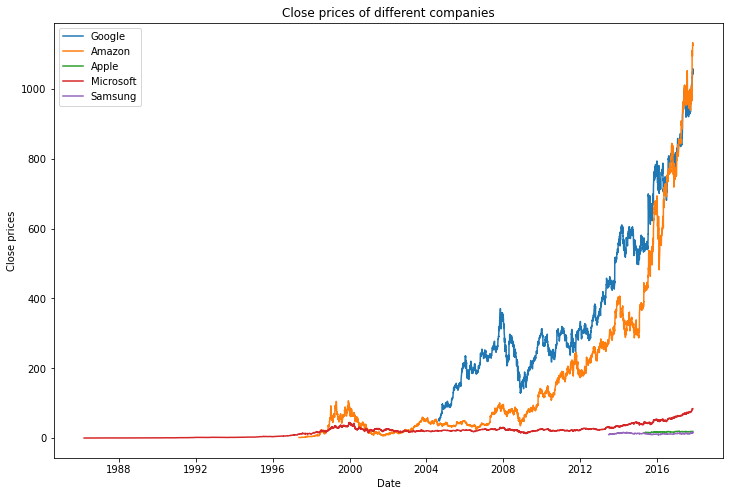

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(df_ggl, label = 'Google')
plt.plot(df_amzn, label = 'Amazon')
plt.plot(df_aple, label = 'Apple')
plt.plot(df_msft, label = 'Microsoft')
plt.plot(df_samg, label = 'Samsung')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.title('Close prices of different companies')
plt.legend()
plt.show()

Google and Amazon time series are not stationary. For other datasets we need to check them individually. 

# ARIMA models

Down below we conducted analys on the example of the dataset of Google close prices. 


To solve the problem of stationarity and autocorrelation, the returns are calculated (r(t) = (S(t) - S(t-1))/S(t-1)).

In [11]:
# Calculate the returns
df_ggl['Return'] = (df_ggl['Close'] - df_ggl['Close'].shift(1))/df_ggl['Close'].shift(1)

Next step we will separate test and train sets and continue our analysis only on the train set.

In [12]:
# Separate into different dataframes
df_ggl_prices = df_ggl[['Close']]
df_ggl_returns = df_ggl[['Return']].dropna()

# Split into train and test sets
prices_train = df_ggl_prices.iloc[:2500]
prices_test = df_ggl_prices.iloc[2500:]

returns_train = df_ggl_returns.iloc[:2500]
returns_test = df_ggl_returns.iloc[2500:]

Plot both train sets

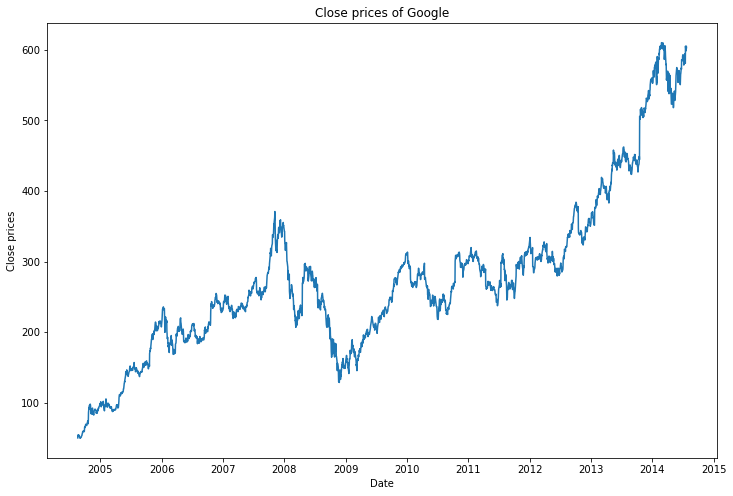

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(prices_train)
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.title('Close prices of Google')
plt.show()

The results of exploratory data analysis

* There are no null/Nan values
* Dates are continuous
* There are no duplicate dates
* There are no potential outliers
* The time series is not stationary
* The time series is not intermittent(there are no several 0 and small values (not nulls) in the series)

Next, we check how the close prices are distributed each year

C:\Users\elena90\Miniconda3\envs\Py3_ICNS\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\elena90\Miniconda3\envs\Py3_ICNS\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\elena90\Miniconda3\envs\Py3_ICNS\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\elena90\Miniconda3\envs\Py3_ICNS\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\elena90\Miniconda3\envs\Py3

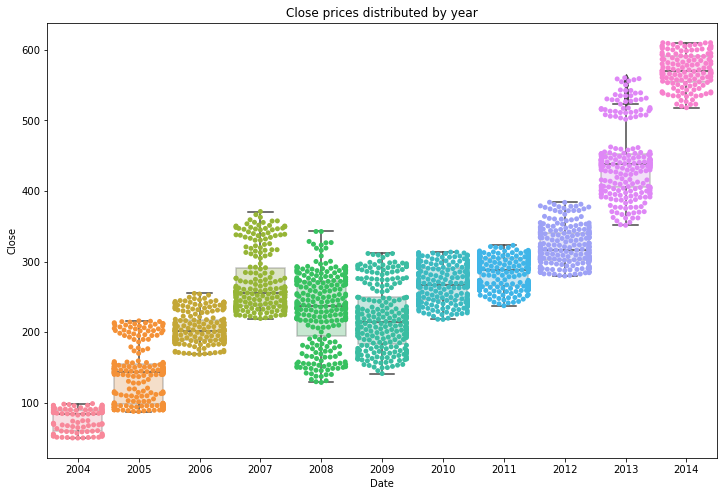

In [14]:
fig, ax = plt.subplots(figsize = (12,8))
plt.title('Close prices distributed by year')
sns.boxplot(data = prices_train, x = prices_train.index.year, y = 'Close',  ax = ax, boxprops = dict(alpha = .3));
sns.swarmplot(data = prices_train, x = prices_train.index.year, y = 'Close');

The results of exploratory data analysis:
* there is positive yearly trend
* there is no potential outliers
* no intermittent patterns
* diffent length of bars indicates different variance - the problem of heteroscedasticity (the variability of a variable is unequal across the time). 

To check the autocorrelation of the data

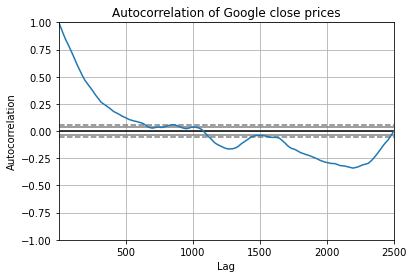

In [15]:
pd.plotting.autocorrelation_plot(prices_train)
plt.title('Autocorrelation of Google close prices')
plt.show()

As we are working on the daily close prices, we can conclude that prices are influenced by their values during previous days. For more than 500 first lags correlation is significant (above the dotted line).

To solve the problem of stationarity and autocorrelation, the returns are calculated (r(t) = (S(t) - S(t-1))/S(t-1)).

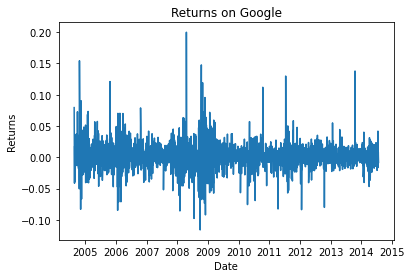

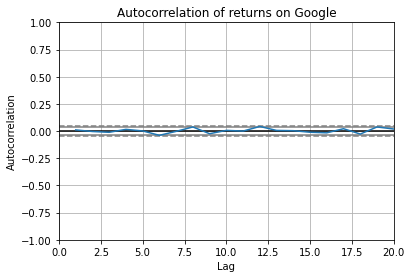

In [16]:
# Plot the returns
plt.plot(returns_train)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Returns on Google')
plt.show()

# Plot autocorrelation of returns
pd.plotting.autocorrelation_plot(df_ggl_returns).set_xlim([0, 20])
plt.title('Autocorrelation of returns on Google')
plt.show()

The returns on Google have no significant autocorrelation (plot is between dotted lines). However, we are faced with the problem of heteroscedasticity (the variability of a variable is unequal across the time).

Initial time series of the close prices was not stationary. For the series of returns we can use the Augmented Dickey-Fuller test. The null hypothesis of this test is that the time series is not stationary, while the alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary. If the pvalue is above a critical size (usually 0.05), then we cannot reject the null hupothesis

In [17]:
# Import the test
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey-Fuller test for close prices
print("p-value for close prices:", adfuller(prices_train)[1])

# Augmented Dickey-Fuller test for returns
print("p-value for returns:", adfuller(returns_train)[1])

p-value for close prices: 0.9452058649542173
p-value for returns: 0.0


As we have already predicted, for the close prices we cannot reject the nul hypothesis, that this time series is not stationary. For the returns we can reject the null hypothesis, that the time series is not stationary.

Autoregressive Integrated Moving Average (ARIMA) model:
* autoregressive models: AR(p)
* moving average models: MA(q)
* mixed autoregressive moving average models: ARMA(p, q)
* integration models: ARIMA(p, d, q)
* seasonal models: SARIMA(P, D, Q, s)

Let's take a look at the PACF to identify potential order of the SARIMA model

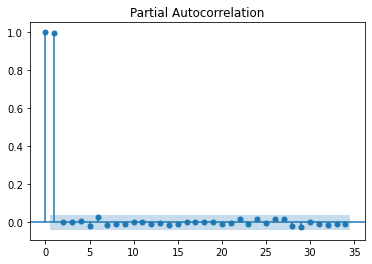

In [18]:
from statsmodels.graphics.tsaplots import  plot_pacf

plot_pacf(prices_train);

In [19]:
prices_test

,Close
Date,
2014-07-25,598.08
2014-07-28,599.02
2014-07-29,593.95
2014-07-30,595.44
2014-07-31,579.55
...,...
2017-11-06,1042.68
2017-11-07,1052.39
2017-11-08,1058.29


Fit ARIMA model to the close prices:

In [20]:
import sklearn.metrics as metrics

def results(y_true, y_pred):
    
    mae=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    
    print('R2:', round(r2,4))
    print('MAE:', round(mae,4))
    print('MSE:', round(mse,4))
    print('RMSE:', round(np.sqrt(mse),4))

In [21]:
import pmdarima as pmd
autoarima_model = pmd.auto_arima(prices_train['Close'],
                                 allowmean=False,
                                 allowdrift=False,
                                 trace=True)

                                 
autoarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15273.180, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15265.632, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15267.276, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15267.273, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15268.280, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15269.191, Time=0.60 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.311 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2500
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -7630.816
Date:                Mon, 14 Dec 2020   AIC                          15265.632
Time:                        11:46:08   BIC                          15277.280
Sample:                             0   HQIC                         15269.861
                               - 2500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2212      0.104      2.123      0.034       0.017       0.425
sigma2        26.2908      0.263    100.037      0.000      25.776      26.806
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):             22193.90
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               2.53   Skew:                             0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The Best model is ARIMA(0,1,0). d = 1 (difference of 1), as the close prices is not a stationary time series

In [22]:
prices_test['prices_ARIMA(0,1,0)'] = autoarima_model.predict(len(prices_test))
results(prices_test['Close'], prices_test['prices_ARIMA(0,1,0)'])

R2: 0.4856
MAE: 86.3139
MSE: 10958.494
RMSE: 104.6828


<ipython-input-22-9c0eff5626c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_test['prices_ARIMA(0,1,0)'] = autoarima_model.predict(len(prices_test))


In [23]:
from pmdarima.arima import ARIMA
model = ARIMA(order = (1,1,0))
model_fit = model.fit(prices_train['Close'])
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2500
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -7630.638
Date:                Mon, 14 Dec 2020   AIC                          15267.276
Time:                        11:46:08   BIC                          15284.747
Sample:                             0   HQIC                         15273.619
                               - 2500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2237      0.104      2.147      0.032       0.020       0.428
ar.L1         -0.0119      0.016     -0.738      0.461      -0.044       0.020
sigma2        26.2852      0.271     96.982      0.0

In [24]:
prices_test['prices_ARIMA(1,1,0)'] = model_fit.fit_predict(prices_test['Close'], n_periods = len(prices_test['Close']))
results(prices_test['Close'], prices_test['prices_ARIMA(1,1,0)'])

R2: -12.3938
MAE: 532.1732
MSE: 285347.95
RMSE: 534.1797


<ipython-input-24-cca1be885ed4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_test['prices_ARIMA(1,1,0)'] = model_fit.fit_predict(prices_test['Close'], n_periods = len(prices_test['Close']))


PACF for the returns:

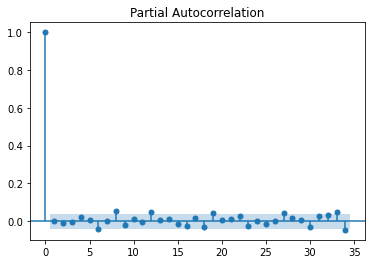

In [25]:
plot_pacf(returns_train);

Fit ARIMA model to the returns:

In [26]:
autoarima_model = pmd.auto_arima(returns_train,
                                 allowmean=False,
                                 allowdrift=False,
                                 trace=True)

                                 
autoarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-12265.489, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-12273.489, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-12271.502, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-12271.502, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12267.083, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-12269.505, Time=0.26 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.369 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2500
Model:                        SARIMAX   Log Likelihood                6138.745
Date:                Mon, 14 Dec 2020   AIC                         -12273.489
Time:                        11:46:10   BIC                         -12261.841
Sample:                             0   HQIC                        -12269.260
                               - 2500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.000      2.814      0.005       0.000       0.002
sigma2         0.0004   5.14e-06     83.954      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10699.36
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As the best model is ARIMA(0,0,0), we aren't able to fit ARIMA to the returns time series.

# Regression

From another dataset we can get the features to run regressions

In [27]:
# file from CNNpred: CNN-based stock market prediction using a diverse set of variables Data Set
# https://archive.ics.uci.edu/ml/datasets/CNNpred%3A+CNN-based+stock+market+prediction+using+a+diverse+set+of+variables#
data = pd.read_csv("Processed_S&P.csv")
data.head()

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,2009-12-31,1115.099976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
1,2010-01-04,1132.989990,0.921723,0.016043,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2,2010-01-05,1136.520020,-0.375903,0.003116,0.016043,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
3,2010-01-06,1137.140015,0.996234,0.000546,0.003116,0.016043,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
4,2010-01-07,1141.689941,0.059932,0.004001,0.000546,0.003116,0.016043,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


Many columns in this dataset do not have the first value. To solve this problem we drop the first row

In [28]:
data = data.drop(data.index[0])

Check that there are no spaces in the column names

In [29]:
data.columns

Index(['Date', 'Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5',
       'ROC_10', 'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200',
       'DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold', 'DAAA',
       'DBAA', 'GBP', 'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ', 'JPM',
       'MSFT', 'WFC', 'XOM', 'FCHI', 'FTSE', 'GDAXI', 'DJI', 'HSI', 'IXIC',
       'SSEC', 'RUT', 'NYSE', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1', 'DE2',
       'DE4', 'DE5', 'DE6', 'CTB3M', 'CTB6M', 'CTB1Y', 'Name', 'AUD', 'Brent',
       'CAC-F', 'copper-F', 'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F',
       'gold-F', 'HSI-F', 'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD',
       'silver-F', 'RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F',
       'Dollar index', 'wheat-F', 'XAG', 'XAU'],
      dtype='object')

Drop info about the S&P index:

* Close - Close price 
* Vol - Relative change of volume 
* MOM-1 - Return of 2 days before 
* MOM-2 - Return of 3 days before 
* MOM-3 - Return of 4 days before 
* ROC-5  5 days Rate of Change 
* ROC-10  10 days Rate of Change 
* ROC-15  15 days Rate of Change 
* ROC-20  20 days Rate of Change 
* EMA-10  10 days Exponential Moving Average 
* EMA-20  20 days Exponential Moving Average 
* EMA-50  50 days Exponential Moving Average 
* EMA-200  200 days Exponential Moving Average
* Name - Name of the index

In [30]:
data = data.drop(['Close','Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5',
       'ROC_10', 'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200', 'Name'], axis=1)

In [31]:
data.columns

Index(['Date', 'DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold',
       'DAAA', 'DBAA', 'GBP', 'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ',
       'JPM', 'MSFT', 'WFC', 'XOM', 'FCHI', 'FTSE', 'GDAXI', 'DJI', 'HSI',
       'IXIC', 'SSEC', 'RUT', 'NYSE', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1',
       'DE2', 'DE4', 'DE5', 'DE6', 'CTB3M', 'CTB6M', 'CTB1Y', 'AUD', 'Brent',
       'CAC-F', 'copper-F', 'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F',
       'gold-F', 'HSI-F', 'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD',
       'silver-F', 'RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F',
       'Dollar index', 'wheat-F', 'XAG', 'XAU'],
      dtype='object')

Change the formant of the column 'Date' and use it as index

In [32]:
data['Date']= pd.to_datetime(data['Date'])
data = data.set_index('Date')

Merge the data from the two sources, using the inner joint

In [33]:
df_complete = pd.merge(df_ggl['Return'], data, left_index=True, right_index=True)

# Drop the column with NaN
df_complete = df_complete.dropna('columns')
df_complete.shape

(1980, 54)

Construct correlation matrix

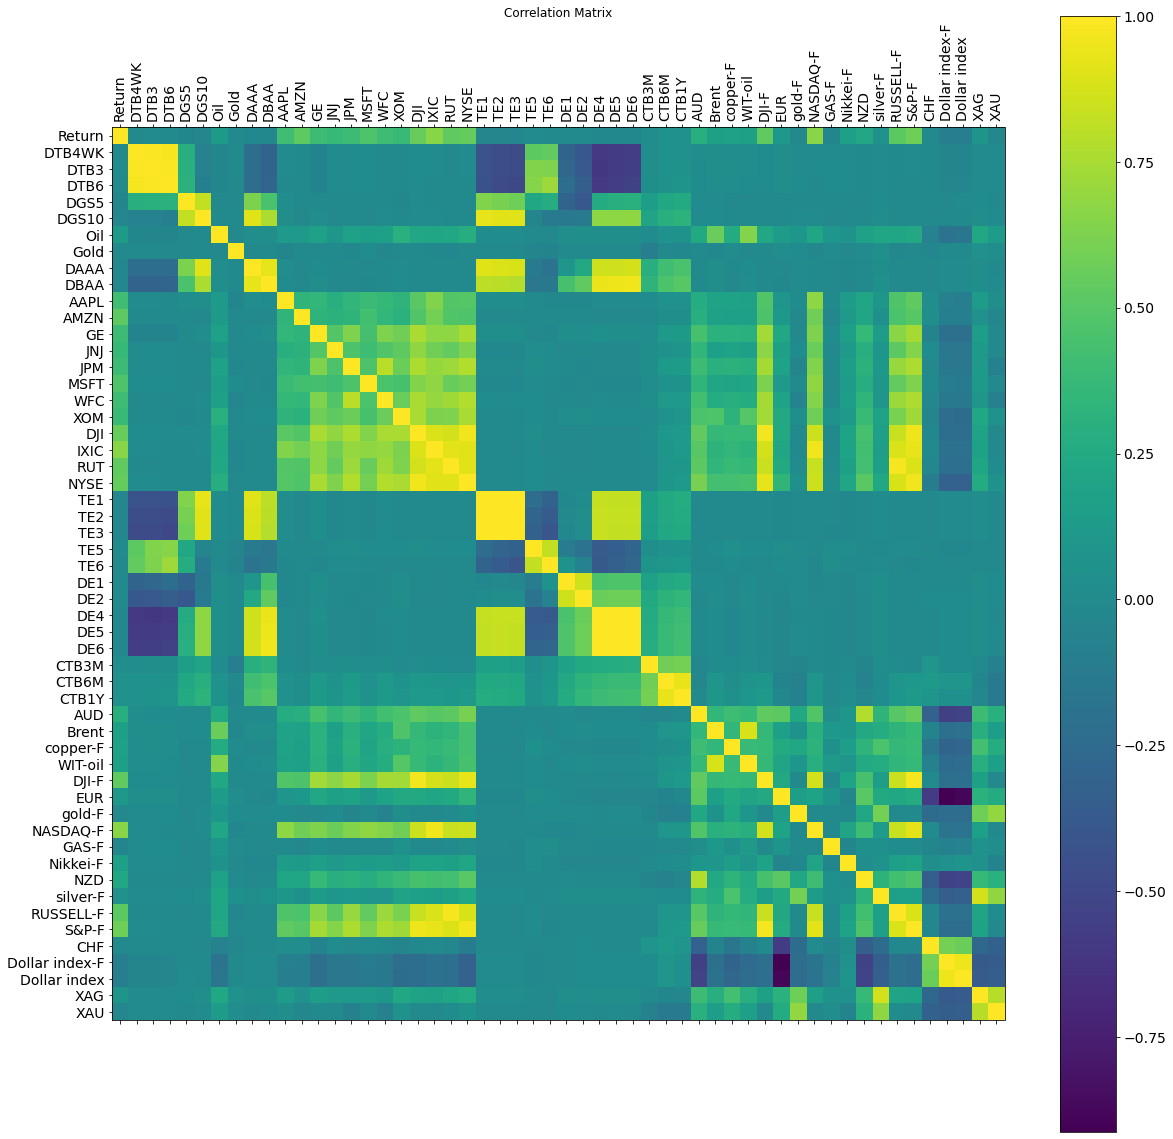

In [34]:
plot = plt.figure(figsize=(20, 20))
plt.matshow(df_complete.corr(), fignum=plot.number)
plt.xticks(range(df_complete.shape[1]), df_complete.columns, fontsize=14, rotation = 90)
plt.yticks(range(df_complete.shape[1]), df_complete.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix')
plt.show()

In [35]:
correlations = df_complete.corr()
correlations.style.background_gradient(cmap='coolwarm')

Some of the features are very closely correlated with each other. They are also constracted in this way. To reduce dimensionality use PCA

In [36]:
# split the data

y = df_complete['Return']
X = df_complete.drop(['Return'], axis = 1)

y_train = y.iloc[:1386]
y_test = y.iloc[1386:]

X_train = X.iloc[:1386]
X_test = X.iloc[1386:]

In [37]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

reduced_data = pd.DataFrame(PCA(n_components = 5).fit_transform(X))
reduced_data.columns = ['PC'+str(i+1) for i in range(5)]
reduced_data.head(5)

,PC1,PC2,PC3,PC4,PC5
0,-8.884106,3.372746,-1.977713,-4.195703,-1.698559
1,-0.998078,-4.729285,-0.300373,-3.988614,0.382575
2,-5.964720,4.995829,-2.808734,-4.313387,0.002663
3,1.335616,-3.432495,-0.037505,-4.287035,-0.300344
4,-1.242771,-1.643104,-0.730774,-4.081663,-1.272844


In [38]:
X_train = reduced_data.iloc[:1386]
X_test = reduced_data.iloc[1386:]

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

print('Simple linear regression')
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results(y_test, y_pred_lr)

print('Ridge regression')
ridge = Ridge().fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
results(y_test, y_pred_ridge)

print('Lasso regression')
lasso = Lasso().fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
results(y_test, y_pred_lasso)

Simple linear regression
R2: 0.2656
MAE: 0.0075
MSE: 0.0002
RMSE: 0.0124
Ridge regression
R2: 0.2656
MAE: 0.0075
MSE: 0.0002
RMSE: 0.0124
Lasso regression
R2: -0.002
MAE: 0.0093
MSE: 0.0002
RMSE: 0.0145


# Support vector machine (SVM)

Support vector machines (SVMs) are supervised learning models with associated learning algortihms that analyze data used for classification and regression analysis. This method is one of the most robust prediction methods, based on the statistical learning framework proposed by Vapnik and Chervonenkis. 

Imports needed for the support vector machine.

In [ ]:
from sklearn import svm,preprocessing 
from sklearn.metrics import classification_report

Function for creating copies of dataframes, so that given dataframes are not changed.

In [ ]:
def create_df_copy(df):
  return df.copy(deep=True)

Creates a plot depending on the values of Date and Close.

In [ ]:
def create_plt(dataframe, name):
  company_dates = [pd.Timestamp(date) for date in dataframe['Date']]
  company_close = np.array(dataframe['Close'],dtype='float')
  
  plt.title(name)
  plt.scatter(company_dates,company_close)
  plt.show()

Function used to get the X and Y depending on the dataframes Close value.

In [ ]:
def get_X_and_Y(df,window_length=7,predict_day_length=1):
    m = len(df.iloc[0])
    n = len(df) - window_length
    m = window_length * m

    X = np.ones((n,m))
    Y = np.ones((n,1))

    for i in range(len(df)-window_length):
        ans = [list(df.iloc[j] for j in range(i, i+window_length))]
        ans = np.array(ans).flatten()
        X[i] = ans
        Y[i] = 1 if df.Close[i+window_length+predict_day_length-1] - df.Close[i+window_length-1] > 0 else 0
      
    return [X,Y]

Method that trains the model and calculates the accuracy of the model.

In [ ]:
def getTrainTestSplit(X, Y, breakoff):
  train_size = int(len(X) * breakoff)
  dataArray = df.to_numpy()
  X_train = X[:train_size]
  y_train = Y[:train_size]
  X_test = X[train_size:]
  y_test = Y[train_size:]
  return (X_train, X_test, y_train, y_test)

In [ ]:
def train_and_test(df,window_length,accurarys,reports):
    X, Y = get_X_and_Y(df, window_length=window_length)
    Y = Y.flatten()
    scaler = preprocessing.StandardScaler()
    scaler.fit_transform(X)
    X_train, X_test, Y_train, Y_test = getTrainTestSplit(X, Y, 0.75)

    for kernel_arg in ['rbf', 'poly', 'linear']:
        clf = svm.SVC(kernel=kernel_arg, max_iter=5000)
        clf.fit(X_train, Y_train)
        y_predict = clf.predict(X_test)

        accurary = clf.score(X_test, Y_test)
        report = classification_report(Y_test, y_predict, target_names = ['Drop','Up'])

        if window_length in accurarys:
            accurarys[window_length].append(accurary)
            reports[window_length].append(report)
        else: 
            accurarys[window_length] = [accurary]
            reports[window_length] = [report]
            
        print('The Accurary of %s : %f'%(kernel_arg,clf.score(X_test, Y_test)))
        print(report)

This is the function, that plays as main for our SVM model.

In [ ]:
def run_SVM(df, name):
  new_df = create_df_copy(df)

  create_plt(new_df, name)

  new_df = new_df.set_index('Date')
  window_lengths = [7,14,21,30,60,90,120,150,180]
  accurarys = {}
  reports ={}

  for length in window_lengths:
      print('window_length:',length)
      train_and_test(new_df, length, accurarys, reports)

Running the SVM model for all of our datasets

In [ ]:
names = ["Amazon", "Google", "Apple", "Microsoft", "Samsung"]
names_idx = 0

for df in dataframe_list:
  run_SVM(df, names[names_idx])
  names_idx += 1

# Neural Networks

Imports that the Neural Networks will use.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## LSTM

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. LSTM models are able to store information over a period of time. This characteristic is extremely useful when we deal with Time-Series or Sequential Data like financial data as all transactions usually have a date with them. When using an LSTM model we are free and able to decide what information will be stored and what discarded.

In [ ]:
#Method to add time_step worth of the nearest values to Tensor object.
def create_LSTM_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):    
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

#Method to create a LSTM model with 2 layers with 50 neurons each and 1 output layer.
def create_LSTM_model (time_step):
  model=Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
  model.add(LSTM(50))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  model.summary()
  return model

#Method to split the data into training and validation data. We can't use train_test_split method as we're dealing with a Time-Series
def splitTrainTestData(breakoff, data):
  train_size = int(len(data) * breakoff)
  train_data = data[:train_size,:]
  test_data = data[train_size:, :1]
  return (train_data, test_data)

#Normalize the values
def scaleData(data):
  scaler=MinMaxScaler()
  scaled=scaler.fit_transform(data)
  return scaled

#Create copy so other models won't be affected.
def create_df_copy(df):
  return df.copy(deep=True)

The value that this LSTM model will predict will be the "Close" value of the stock price. As all of the data is already in chronological order. We just need to take just the target value from the dataset and normalize it. After, which we split the data into training and validation data to later on train our model. To make use of the LSTM characteristic memory, we attach 90 (time_step) chronologically closest values for each entry in the dataframe. When that is done, we reshape the current arrays into Tensor objects so that the Neural Networks are able to easily understand and use them to learn. Our model has 2 LSTM layers with 50 neurons each and a single Dense Layer so that our prediction would be singular entry of data. To test the efficiency of our data, we compare the prediction of the model with the "Close" values from the DataFrame on a simple graph.

Our LSTM model was quite succesful, as it was able to grasp the general structure, matching the changes in the stock market, but not quite perfectly. Our LSTM model had a lag of 1 day.

In [ ]:
def findLSTMResult(dataframe, name) :
  df = create_df_copy(dataframe)

  data = np.array(df["Close"]).reshape(-1,1)
  data=scaleData(data)

  train_data, test_data = splitTrainTestData(0.7, data)

  time_step = 90
  X_train, y_train = create_LSTM_dataset(train_data, time_step)
  X_test, y_test = create_LSTM_dataset(test_data, time_step)

  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

  model= create_LSTM_model(time_step)

  model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=32, batch_size=32)

  resultsplot = np.concatenate((model.predict(X_train), model.predict(X_test)), axis=0)

  sns.lineplot(data=data[:, 0], label="Original")
  sns.lineplot(data=resultsplot[:, 0], label="Predicted")
  plt.xlabel("Stock close price")
  plt.title(name, size=24)


In [ ]:
findLSTMResult(df_new_google, "Google")

In [ ]:
findLSTMResult(df_new_amazon, "Amazon")

In [ ]:
findLSTMResult(df_new_samsung, "Samsung")

In [ ]:
findLSTMResult(df_new_apple, "Apple")

In [ ]:
findLSTMResult(df_new_microsoft, "Microsoft")

## CNN

Convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, that is most commonly applied to analyzing visual imagery and have applications in financial time series.

As CNNs are recommended for stock prediction, we thought we would try them out and see whether they should be or not.

Our objective with the CNN was to try to predict whether the stock price went up during the day or not. To understand easier whether the "Close" value was higher than the "Open" value for each entry in the dataframe.

Starting with making a new boolean column whether it went up during the day or not. We split the data into training and validation data and normalized it as before with our LSTM model. As our understanding of the CNN is not in-depth, we sticked with a simple model to test the generalization of predicting such classes on financial data. To get our results, we used sklearn.metric functions to see the accuracy, precision, recall and f1 of the model.

In [ ]:
#Method to make our CNN model
def create_CNN_model (shapesize):
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=1, input_shape=(shapesize, 1)))
  model.add(MaxPooling1D(pool_size=(1)))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

#Method to split our data into training and validation with 0.8 split.
def createCNNTrainTestData(df):
  train_size = int(len(df) * 0.8)
  dataArray = df.to_numpy()
  X_train = dataArray[:train_size, :-1]
  y_train = dataArray[:train_size, -1]
  X_test = dataArray[train_size:, :-1]
  y_test = dataArray[train_size:, -1]
  return (X_train, y_train, X_test, y_test)

#Method to print out our metrics for the model.
def printStatistics(y_test, results):
  accuracy = accuracy_score(y_test, results)
  precision = precision_score(y_test, results)
  recall = recall_score(y_test, results)
  f1 = f1_score(y_test, results)
  print('Accuracy: '+str(accuracy))
  print('Precision: '+str(precision))
  print('Recall: '+str(recall))
  print('F1 Score: '+str(f1))


In [ ]:
def findCNNResult(dataframe) :
  df = create_df_copy(dataframe)

  df['Shift'] = df['Open'].shift(periods=-10).dropna()
  df['y'] = np.where(df['Open'] < df['Shift'], 1, 0)
  df = df.drop(labels=['Date', 'OpenInt'], axis=1)

  X_train, y_train, X_test, y_test = createCNNTrainTestData(df)

  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

  model = create_CNN_model(X_train.shape[1])
  model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1000, verbose=1)

  results = model.predict_classes(X_test, verbose=0)[:, 0]

  printStatistics(y_test, results)

In [ ]:
findCNNResult(df_new_google)

In [ ]:
findCNNResult(df_new_apple)

In [ ]:
findCNNResult(df_new_amazon)

In [ ]:
findCNNResult(df_new_samsung)

In [ ]:
findCNNResult(df_new_microsoft)

# Pages that helped us in this project : 

https://en.wikipedia.org/

https://scikit-learn.org/

https://stackabuse.com